# EDA of Data

<a id="0"></a> <br>

 ## Table of Contents  
- [Imports](#1) 
- [Read in and Merge Queries](#2)
- [Data Processing](#3)
- [Main EDA](#4)
    - [is_ftd Analysis](#5)
    - [Split Data for is_ftd and non_ftds for EDA](#6)
    - [Inactive non_ftd Analysis](#7)
    - [Inactive ftd](#8)
- [FTD Only EDA](#9)
    - [Age](#10)
    - [Coupon Designation](#11)
    - [All vs Non-Limited Users](#12)
- [Appendix EDA](#13)
    - [First SP Result](#14)
    - [Coupon Designation](#15)
    - [Age](#16)

<a id="1"></a>
### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id="2"></a>

### Read in and Merge Queries

In [6]:
query_1 = pd.read_csv('/home/tom/Documents/ParlayPlay/Data/query_1.csv')
query_1 = query_1.dropna(subset='coupon_signup_id') # one nan in this column which was stopping the left join
query_1['coupon_signup_id'] = query_1['coupon_signup_id'].astype('Int64')
query_2 = pd.read_csv('/home/tom/Documents/ParlayPlay/Data/query_2.csv')
query_3 = pd.read_csv('/home/tom/Documents/ParlayPlay/Data/query_3.csv')
query_5 = pd.read_csv('/home/tom/Documents/ParlayPlay/Data/query_5.csv')
query_5 = query_5.rename(columns={'id':'coupon_id'})
query_6 = pd.read_csv('/home/tom/Documents/ParlayPlay/Data/query_6.csv')
query_7 = pd.read_csv('/home/tom/Documents/ParlayPlay/Data/fda_data.csv')

In [7]:
df = pd.merge(query_1, query_2, how='left', left_on='id', right_on = 'username_id')
df = pd.merge(df, query_3, how='left', on='username')
df = pd.merge(df, query_5[['coupon_id','coupon_designation']], how='left', left_on='coupon_signup_id', right_on = 'coupon_id')
df = pd.merge(df, query_6, how='left', left_on='id', right_on = 'id')

<a id="3"></a>

### Data Processing

In [16]:
df = df.fillna(0)

<a id="4"></a>

## Main EDA

<a id="5"></a>

### is_ftd Analysis

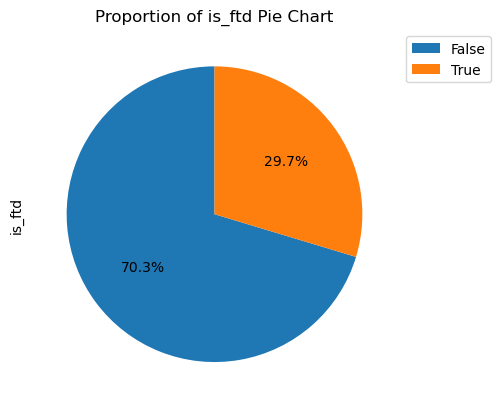

In [17]:
df['is_ftd'].value_counts().plot(kind='pie', labels = None, startangle=90, legend =True,  autopct='%1.1f%%')
plt.legend(labels = df['is_ftd'].value_counts().index, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Proportion of is_ftd Pie Chart')
plt.show()

<a id="6"></a>

### Split Data for is_ftd and non_ftds for EDA

In [18]:
df_ftd = df[df['is_ftd'] == True]
df_non_ftd = df[df['is_ftd'] == False]

<a id="7"></a>

### Inactive non_ftd Analysis 

In [49]:
df_non_ftd['zero_contests'] = df_non_ftd['contest_count'] > 0

/tmp/ipykernel_32598/2534838057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_ftd['zero_contests'] = df_non_ftd['contest_count'] > 0


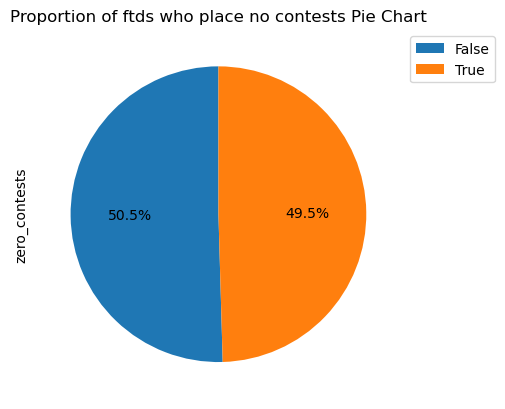

In [50]:
df_non_ftd['zero_contests'].value_counts().plot(kind='pie', labels = None, startangle=90, legend =True, autopct='%1.1f%%')
plt.legend(labels = df_non_ftd['zero_contests'].value_counts().index, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Proportion of ftds who place no contests Pie Chart')
plt.show()

<a id="8"></a>

### Inactive ftd

In [51]:
df_ftd['zero_contests'] = df_ftd['contest_count'] > 0

/tmp/ipykernel_32598/3736925006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ftd['zero_contests'] = df_ftd['contest_count'] > 0


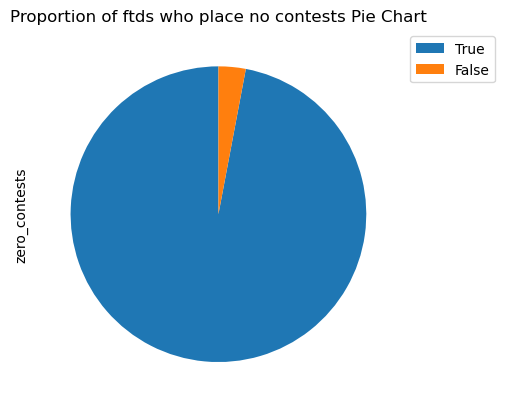

In [52]:
df_ftd['zero_contests'].value_counts().plot(kind='pie', labels = None, startangle=90, legend =True)
plt.legend(labels = df_ftd['zero_contests'].value_counts().index, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Proportion of ftds who place no contests Pie Chart')
plt.show()

<a id="9"></a>

# FTD Only EDA

<a id="10"></a>

### Age

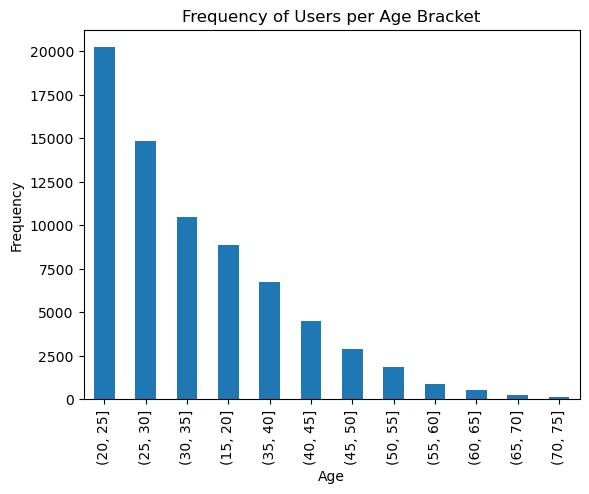

In [53]:
pd.cut(df_ftd["age"], np.arange(15, 80, 5)).value_counts().plot(kind = 'bar')
plt.title("Frequency of Users per Age Bracket")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

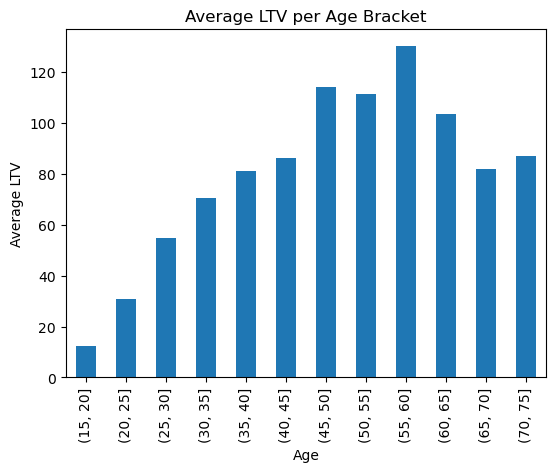

In [54]:
df_ftd['net_cash'].groupby(pd.cut(df_ftd["age"], np.arange(15, 80, 5))).mean().plot(kind = 'bar')
plt.title("Average LTV per Age Bracket")
plt.ylabel("Average LTV")
plt.xlabel('Age')
plt.show()

<a id="11"></a>

### Coupon Designation

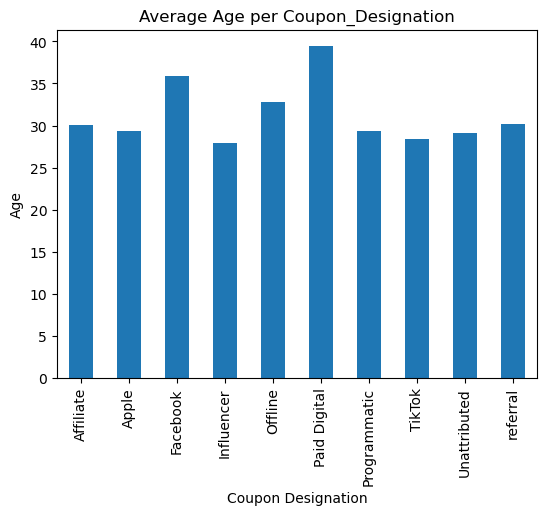

In [55]:
df_ftd[['coupon_designation','age']].groupby('coupon_designation').mean().plot(kind='bar')
plt.title("Average Age per Coupon_Designation")
plt.legend().remove()
plt.xlabel("Coupon Designation")
plt.ylabel("Age")
plt.show()

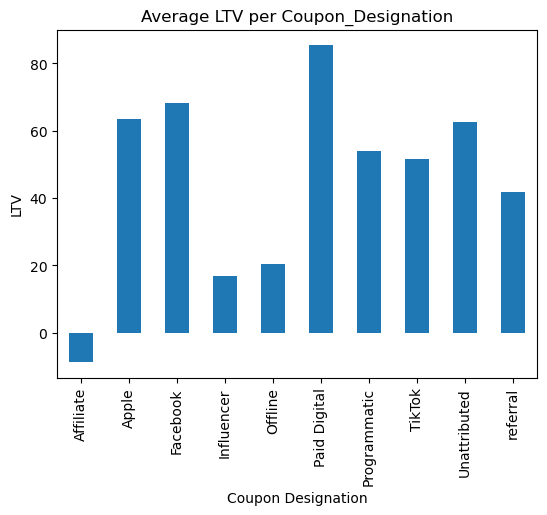

In [56]:
df_ftd[['coupon_designation','net_cash']].groupby('coupon_designation').mean().plot(kind='bar')
plt.title("Average LTV per Coupon_Designation")
plt.legend().remove()
plt.xlabel("Coupon Designation")
plt.ylabel("LTV")
plt.show()

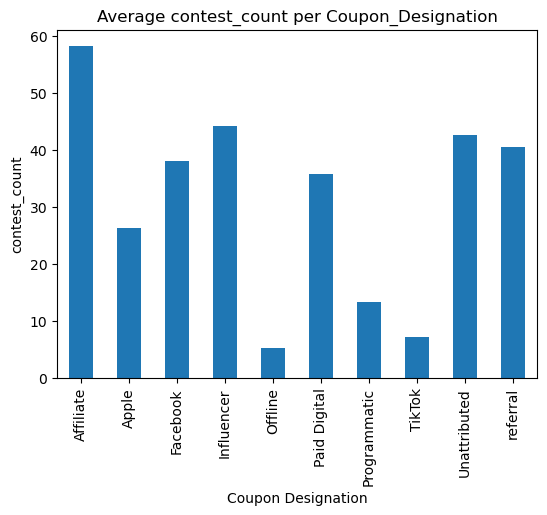

In [58]:
df_ftd[['coupon_designation','contest_count']].groupby('coupon_designation').mean().plot(kind='bar')
plt.title("Average contest_count per Coupon_Designation")
plt.legend().remove()
plt.xlabel("Coupon Designation")
plt.ylabel("contest_count")
plt.show()

<a id="12"></a>


### All vs Non-Limited Users

In [61]:
df_ftd_drop_lim = df_ftd[df_ftd['is_limited'] == False]

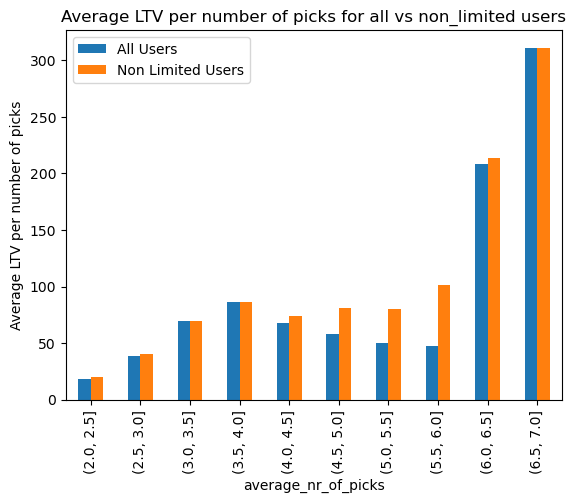

In [64]:
df_ftd_drop_lim_ltv_num_picks = df_ftd_drop_lim['net_cash'].groupby(pd.cut(df_ftd_drop_lim["average_nr_of_picks"], np.arange(2, 7.5, 0.5))).mean()
df_ftd_all_ltv_num_picks = df_ftd['net_cash'].groupby(pd.cut(df_ftd["average_nr_of_picks"], np.arange(2, 7.5, 0.5))).mean()

both_dfs = pd.merge(df_ftd_all_ltv_num_picks, df_ftd_drop_lim_ltv_num_picks, on = "average_nr_of_picks")
both_dfs = both_dfs.set_axis(['All Users', 'Non Limited Users'], axis=1)

both_dfs.plot(kind = 'bar')
plt.ylabel("Average LTV per number of picks")
plt.title("Average LTV per number of picks for all vs non_limited users")

plt.show()

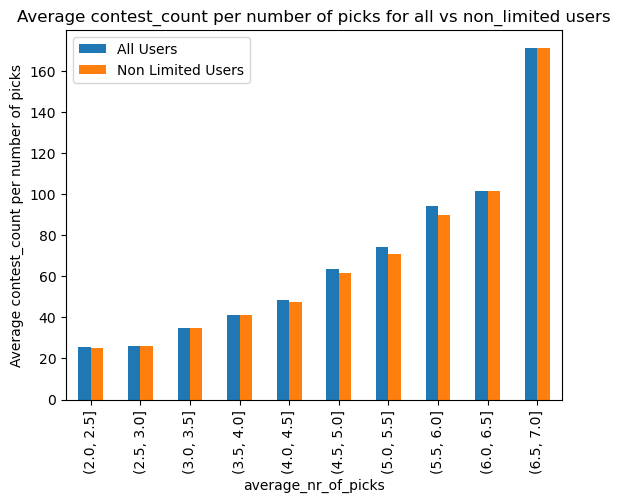

In [65]:
df_ftd_drop_lim_ltv_num_picks = df_ftd_drop_lim['contest_count'].groupby(pd.cut(df_ftd_drop_lim["average_nr_of_picks"], np.arange(2, 7.5, 0.5))).mean()
df_ftd_all_ltv_num_picks = df_ftd['contest_count'].groupby(pd.cut(df_ftd["average_nr_of_picks"], np.arange(2, 7.5, 0.5))).mean()

both_dfs = pd.merge(df_ftd_all_ltv_num_picks, df_ftd_drop_lim_ltv_num_picks, on = "average_nr_of_picks")
both_dfs = both_dfs.set_axis(['All Users', 'Non Limited Users'], axis=1)

both_dfs.plot(kind = 'bar')
plt.ylabel("Average contest_count per number of picks")
plt.title("Average contest_count per number of picks for all vs non_limited users")

plt.show()

<a id="13"></a>

# Appendix EDA

<a id="14"></a>

### First SP Result

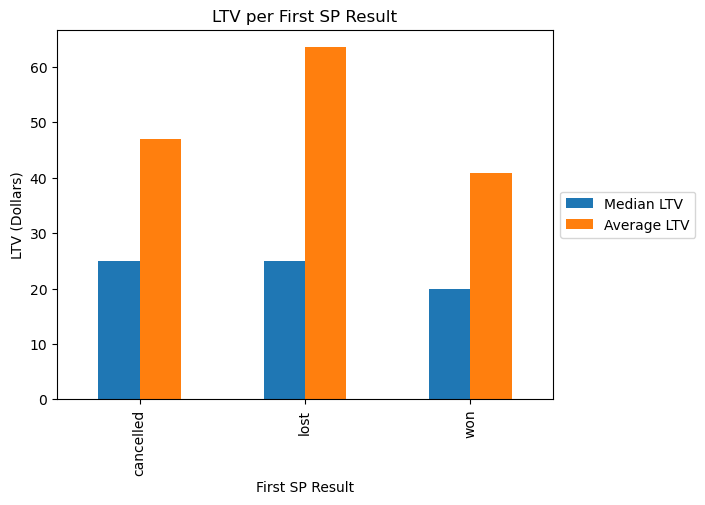

In [71]:
df_ftd_result = df_ftd[df_ftd['result'] != 0]
df_mean_av_entry_fda = df_ftd_result.groupby('result').net_cash.mean()
df_median_av_entry_fda = df_ftd_result.groupby('result').net_cash.median()
both_dfs = pd.concat([df_median_av_entry_fda, df_mean_av_entry_fda], axis = 1)
both_dfs = both_dfs.set_axis(['Median LTV', 'Average LTV'], axis=1)
both_dfs.plot(kind = 'bar')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("LTV (Dollars)")
plt.xlabel("First SP Result")
plt.title("LTV per First SP Result")
plt.show()

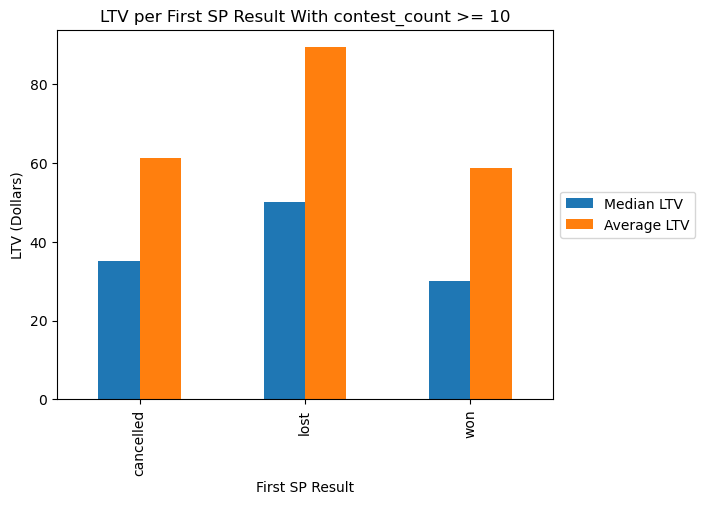

In [76]:
df_ftd_result_active = df_ftd[(df_ftd['result'] != 0) & (df_ftd['contest_count'] >= 10)]
df_mean_av_entry_fda = df_ftd_result_active.groupby('result').net_cash.mean()
df_median_av_entry_fda = df_ftd_result_active.groupby('result').net_cash.median()
both_dfs = pd.concat([df_median_av_entry_fda, df_mean_av_entry_fda], axis = 1)
both_dfs = both_dfs.set_axis(['Median LTV', 'Average LTV'], axis=1)
both_dfs.plot(kind = 'bar')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("LTV (Dollars)")
plt.xlabel("First SP Result")
plt.title("LTV per First SP Result With contest_count >= 10")
plt.show()

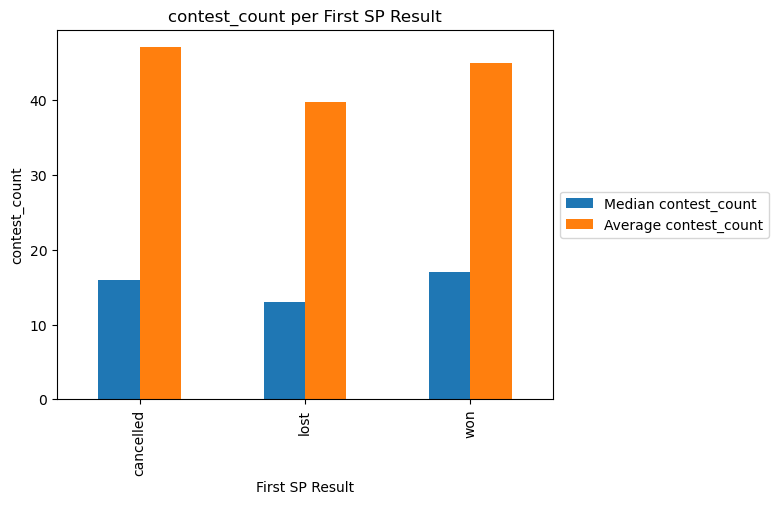

In [73]:
df_ftd_result = df_ftd[df_ftd['result'] != 0]
df_mean_av_entry_fda = df_ftd_result.groupby('result').contest_count.mean()
df_median_av_entry_fda = df_ftd_result.groupby('result').contest_count.median()
both_dfs = pd.concat([df_median_av_entry_fda, df_mean_av_entry_fda], axis = 1)
both_dfs = both_dfs.set_axis(['Median contest_count', 'Average contest_count'], axis=1)
both_dfs.plot(kind = 'bar')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("contest_count")
plt.xlabel("First SP Result")
plt.title("contest_count per First SP Result")
plt.show()

<a id="15"></a>

### Coupon Designation

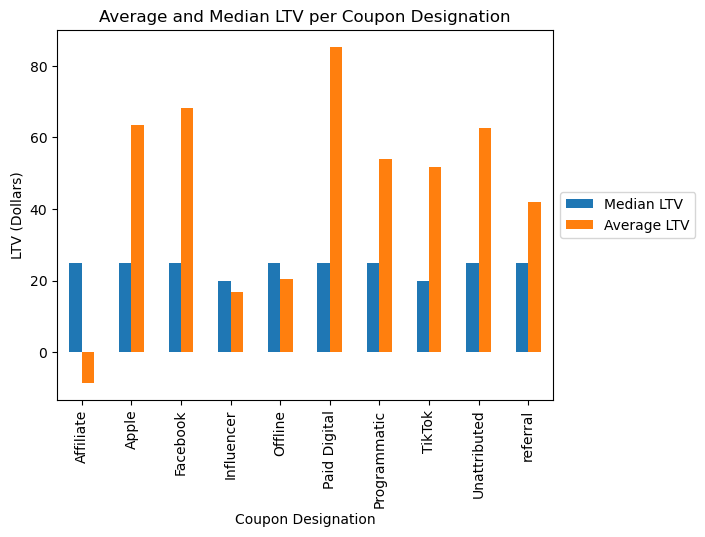

In [78]:
df_mean_av_entry_fda = df_ftd.groupby('coupon_designation').net_cash.mean()
df_median_av_entry_fda = df_ftd.groupby('coupon_designation').net_cash.median()
both_dfs = pd.concat([df_median_av_entry_fda, df_mean_av_entry_fda], axis = 1)
both_dfs = both_dfs.set_axis(['Median LTV', 'Average LTV'], axis=1)
both_dfs.plot(kind = 'bar')
plt.ylabel("LTV (Dollars)")
plt.xlabel("Coupon Designation")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Average and Median LTV per Coupon Designation")

plt.show()

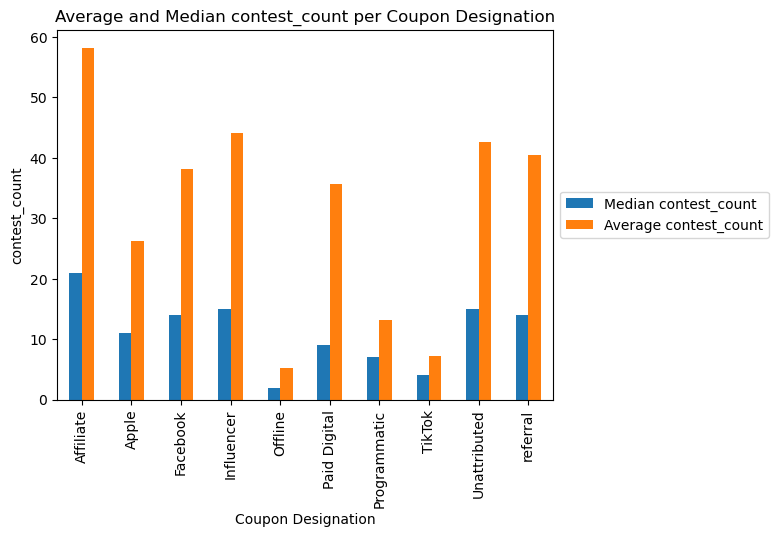

In [79]:
df_mean_av_entry_fda = df_ftd.groupby('coupon_designation').contest_count.mean()
df_median_av_entry_fda = df_ftd.groupby('coupon_designation').contest_count.median()
both_dfs = pd.concat([df_median_av_entry_fda, df_mean_av_entry_fda], axis = 1)
both_dfs = both_dfs.set_axis(['Median contest_count', 'Average contest_count'], axis=1)
both_dfs.plot(kind = 'bar')
plt.ylabel("contest_count")
plt.xlabel("Coupon Designation")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Average and Median contest_count per Coupon Designation")

plt.show()

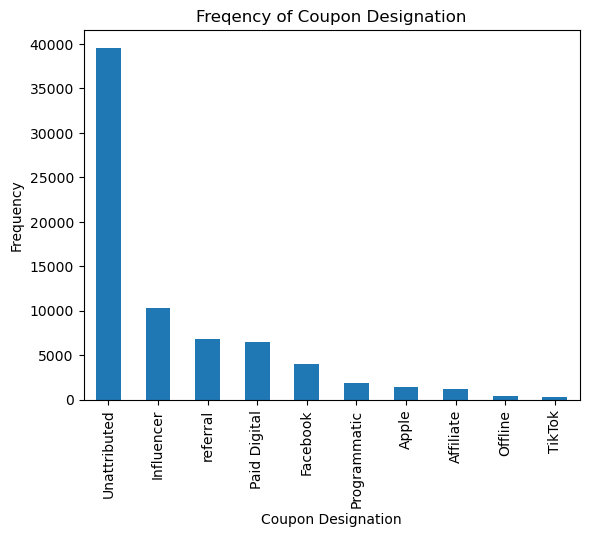

In [81]:
df_ftd['coupon_designation'].value_counts().plot(kind = 'bar')
plt.ylabel("Frequency")
plt.title("Freqency of Coupon Designation")
plt.xlabel("Coupon Designation")
plt.show()

<a id="16"></a>

### Age

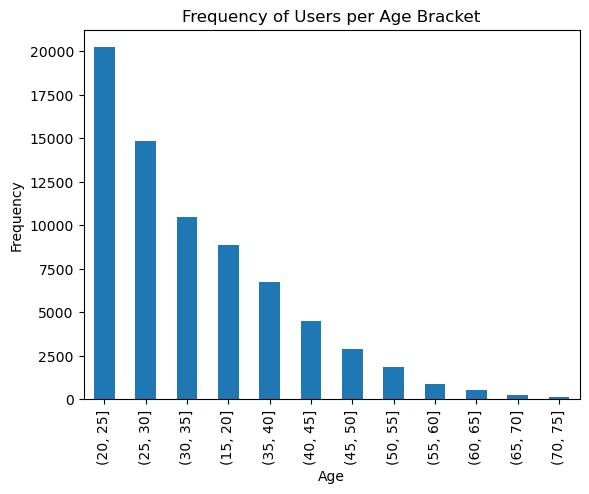

In [82]:
pd.cut(df_ftd["age"], np.arange(15, 80, 5)).value_counts().plot(kind = 'bar')
plt.title("Frequency of Users per Age Bracket")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

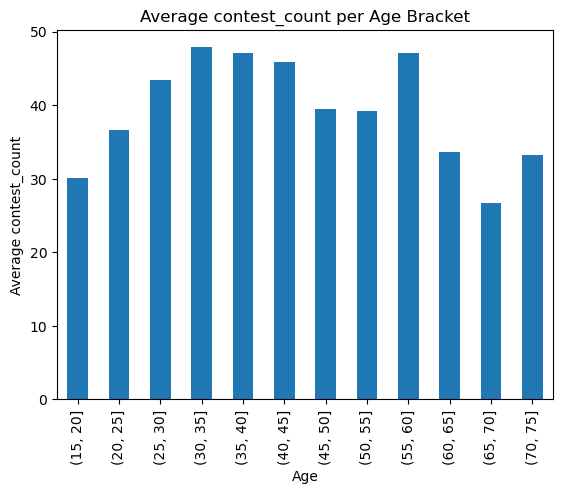

In [83]:
df_ftd['contest_count'].groupby(pd.cut(df_ftd["age"], np.arange(15, 80, 5))).mean().plot(kind = 'bar')
plt.title("Average contest_count per Age Bracket")
plt.ylabel("Average contest_count")
plt.xlabel('Age')
plt.show()